# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, and coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

Please show all work, keep written answers succinct and to the point and most of all, thanks for your time and good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 0. Lecture des données

In [2]:

df_raw = pd.read_csv('Tutorial22_df.csv')
df_expected = pd.read_csv('Tutorial22_xG_df.csv')


# 1. Exploration des données

In [3]:
print(df_raw.columns)
print(df_expected.columns)

Index(['gameid', 'teamid', 'opposingteamid', 'compiledgametime', 'playerid',
       'eventname', 'outcome', 'type', 'possessionid', 'zone', 'xcoord',
       'ycoord', 'teamskatersonicecount', 'opposingteamskatersonicecount',
       'goal', 'team_net_empty', 'opponent_net_empty', 'scoredifferential'],
      dtype='object')
Index(['teamid', 'compiledgametime', 'playerid', 'xg'], dtype='object')


In [4]:
df_raw.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
0,70632,596,724,2859.1333,485421,pass,successful,south,442,nz,-2.720505,-24.610668,5,5,0,0,0,3
1,70632,596,724,1023.5333,485421,pass,successful,north,160,oz,31.990311,9.805882,5,4,0,0,0,2
2,70632,724,596,3112.6667,628757,linecarry,successful,none,470,nz,-24.894119,-28.917648,5,5,0,0,0,-3
3,70632,724,596,212.2000,673651,pass,successful,outlet,30,dz,-73.223618,37.966553,5,5,0,0,0,0
4,70632,596,724,1893.6666,847481,reception,successful,regular,285,dz,-49.090302,-37.467644,5,5,0,0,0,3


In [5]:
df_expected.head()

,teamid,compiledgametime,playerid,xg
0,724,33.30,628757,0.134104
1,724,35.10,838211,0.188982
2,724,60.30,628757,0.092400
3,724,68.20,288890,0.039566
4,724,74.82,288890,0.066700


In [6]:
df_raw.describe()

,gameid,teamid,opposingteamid,compiledgametime,playerid,possessionid,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
count,1655.0,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,70632.0,663.287009,656.712991,1792.712528,530491.050151,275.578248,0.927093,-1.120237,4.991541,4.869486,0.003021,0.028399,0.006647,-0.097281
std,0.0,63.934853,63.934853,1036.006068,271116.203263,158.014559,57.444828,27.061861,0.255391,0.366203,0.054898,0.166160,0.081279,2.324276
min,70632.0,596.000000,596.000000,0.066667,45223.000000,0.000000,-99.285210,-41.488220,4.000000,3.000000,0.000000,0.000000,0.000000,-3.000000
25%,70632.0,596.000000,596.000000,929.533330,303683.000000,149.500000,-46.499073,-26.908823,5.000000,5.000000,0.000000,0.000000,0.000000,-2.000000
50%,70632.0,724.000000,596.000000,1745.400000,538217.000000,266.000000,0.176498,-1.261780,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,70632.0,724.000000,724.000000,2689.050050,797810.000000,417.000000,49.088989,24.392646,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000
max,70632.0,724.000000,724.000000,3593.366700,952287.000000,563.000000,98.370667,40.988235,6.000000,6.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df_expected.describe()

,teamid,compiledgametime,playerid,xg
count,62.000000,62.000000,62.000000,62.000000
mean,660.000000,1681.722043,602372.467742,0.128461
std,64.522458,1217.082471,254095.627817,0.159823
min,596.000000,33.300000,45223.000000,0.003050
25%,596.000000,555.266695,409006.250000,0.038725
50%,660.000000,1430.833300,651204.000000,0.088917
75%,724.000000,2962.166675,812630.000000,0.146747
max,724.000000,3593.366700,952287.000000,0.999535


## Q1) 
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

## A1) Completed

### a) Winner: team 596; Loser: team 724; Score: 4-1

The team 596 won against the team 724 with a score of 3-1


### b) EV 596: 4.742615; EV 724: 3.221937

The team 596 won the expected goals battle (xg) with a score of 4.74 where as the team 724 had a score of 3.22

### c)

By looking at both expected values and the actual game, we expected team 596 to win and that's what happened, so 
there is no surprise there. However, the expected values suggest that the game should have been a little closer than
it has, which suggest that team 724 underperformed

In [8]:
# combien de matchs ont été joués: 1 seule partie
print(df_raw['gameid'].unique())

# quel type de event? 
print(df_raw['eventname'].unique())

[70632]
['pass' 'linecarry' 'reception' 'shot']


In [9]:
# a) who won the game? 724 or 596

# df_raw[df_raw['eventname'] == 'shot']['outcome'].unique()
# df_raw[df_raw['eventname'] == 'shot']['type'].unique()
# tmp = df_raw[(df_raw['eventname'] == 'shot') & (df_raw['outcome'] == 'successful')]
tmp = df_raw[(df_raw['eventname'] == 'shot') & (df_raw['outcome'] == 'successful') & (df_raw['teamid'] == 724)]
tmp.sort_values(by=['compiledgametime'], ascending=False)

# 
df_raw.groupby(['teamid'])['goal'].sum()

teamid
596    4
724    1
Name: goal, dtype: int64

In [10]:
# b) Who won the Expected Goals (xg) battle & what was each team's total xg?

df_expected_724 = df_expected.loc[df_expected['teamid'] == 724]
df_expected_596 = df_expected.loc[df_expected['teamid'] == 596]

df_expected.groupby(['teamid']).agg({'xg': ['sum', 'count', 'mean', 'std']}).reset_index()

teamid        xg                          
               sum count      mean       std
0    596  4.742615    31  0.152988  0.206263
1    724  3.221937    31  0.103933  0.090282

## Q2)
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

## A2) Completed

### a) Possession with most successful passes: 417 with 8 successful passes

### b) 

There were 8 successful in the 417th possessions. Since this possession occured at the end of the game when 
the team 596 were leading 3-0 against team 724, the team 596 might have played more defensively (they don't need to take risk to win) which allowed team 724 to pass more easily.

In [11]:
passes = df_raw[(df_raw['eventname'] == 'pass') & (df_raw['outcome'] == 'successful')].groupby(['possessionid'])['outcome'].count().reset_index(name='count')
passes.sort_values(by = 'count', ascending=False)

,possessionid,count
226,417,8
54,111,6
140,262,6
90,175,6
96,189,6
...,...,...
180,328,1
64,127,1
182,332,1
184,338,1


In [12]:
df_raw.loc[df_raw['possessionid'] == 417]
# df_raw.loc[df_raw['possessionid'] == 111]
# df_raw.loc[df_raw['possessionid'] == 262]


,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
85,70632,724,596,2700.0000,698619,reception,successful,regular,417,oz,32.441177,-1.255882,5,4,0,0,0,-3
104,70632,724,596,2703.2334,698619,pass,failed,north,417,oz,73.179413,27.914705,5,4,0,0,0,-3
872,70632,724,596,2683.6000,890686,pass,successful,outlet,417,dz,-63.117645,31.938236,5,4,0,0,0,-3
890,70632,724,596,2685.5000,154967,reception,successful,regular,417,dz,-33.947052,-4.273529,5,4,0,0,0,-3
900,70632,724,596,2686.0000,154967,linecarry,successful,none,417,dz,-25.900002,-6.285294,5,4,0,0,0,-3
906,70632,724,596,2686.9333,154967,linecarry,successful,none,417,nz,-0.250000,-18.858822,5,4,0,0,0,-3
913,70632,724,596,2688.1667,154967,linecarry,successful,none,417,oz,25.902939,-35.455879,5,4,0,0,0,-3
925,70632,724,596,2688.7334,154967,pass,successful,south,417,oz,37.470589,-38.473526,5,4,0,0,0,-3
929,70632,724,596,2689.3667,698619,reception,successful,regular,417,oz,30.932350,-39.479408,5,4,0,0,0,-3
940,70632,724,596,2691.6000,154967,reception,successful,regular,417,oz,82.735291,-37.467644,5,4,0,0,0,-3


## Q3)
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

## A3) Completed

### a)

By looking at the minimum and maximum values in each zone, we see that the threshold for each zone is around -25 and 
25, which suggest that the coordinates of of the two bluelines are at x-coordinate of -25 and 25 from the middle of the field respectively. 

Also, since the minimum and maximum x-coordinates of the field are respectively -100 and 100, we know that a 
hockey field length is 200 yards/meters (depending on the unit of x/y coordinates)

In [13]:
# df_raw['type'].unique()
# df_raw['zone'].unique() # nz: neutral zone; oz: offensive zone; dz: defensive zone

df_raw.groupby(['zone'])['xcoord'].agg(['mean', 'min', 'max'])

,mean,min,max
zone,,,
dz,-61.599453,-99.285210,-25.019859
nz,-2.259677,-24.941277,24.949127
oz,59.073753,25.344994,98.370667


## Q4)
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

## A4)
### a) Completed


65 47


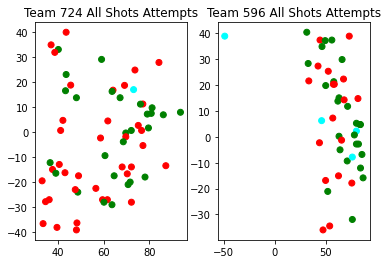

In [19]:
# plotting all shot attempts by (1) type of shots (2) outcome: success, fail (color)
# type of shots: Shovel, Wrist, Snap, Slapshot, Backhand

def plot_shot_attempts(df_shots_, team_number, shot_type, ax):
    color_dict = {'successful': 'green', 'failed': 'red'}
    colors = [color_dict[outcome] for outcome in df_shots_['outcome']]
    colors = ['cyan' if goal else colors[i] for i, goal in enumerate(df_shots_['goal'])]
    ax.scatter(df_shots_['xcoord'], df_shots_['ycoord'], c=colors)
    ax.set_title(f'Team {team_number} {shot_type} Shots Attempts')


def plot_all_shots_attempts(df_raw, shot_type):
    shots_724 = df_raw[(df_raw['eventname'] == 'shot') & (df_raw['teamid'] == 724)]
    shots_596 = df_raw[(df_raw['eventname'] == 'shot') & (df_raw['teamid'] == 596)]
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plot_shot_attempts(shots_724, '724', shot_type, ax1)
    plot_shot_attempts(shots_596, '596', shot_type, ax2)
    
#     print(len(shots_724), len(shots_596))    

plot_all_shots_attempts(df_raw, 'All')

In [16]:
print(df_raw['eventname'].unique())
print(df_raw[df_raw['eventname'] == 'shot']['type'].unique())

['pass' 'linecarry' 'reception' 'shot']
['outside' 'slot' 'outsideblocked' 'slotblocked']


### b) 

<!-- We see that shot attempts for team 724 is more scattered than shot attempted by team 596. 
We also see that team 596 mostly attempt their shot from the right side of the field. -->

By looking at the scatterplot, we see that team 724 shot attempts are more scattered around the field (more toward the left field, before their middle line) whereas 
team 596 shot attempts were almost all from the right side of the field after their middle line. We also see that team 596 goals were 
scored around the middle line, which may suggest that the goaler from team 724 should improve slap shots blocks (we 
should perform hypothesis testing using data from several game to answer this question). We also see that team 724 
had more shot attempts than team 596


## Q5)
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

## A5)

### a) Completed

Team 596 scored the goal with the furthest distance from the net with a distance of 143.486 from the net


In [20]:
# using euclidean distance
def dist_from_net(x, y):
    shot = np.array([x, y])
    net = np.array([89, 0])
    return round(np.linalg.norm(shot-net), 3)

# calculate distance from each shot to net
df_distances = df_raw[(df_raw['eventname'] == 'shot')]
df_distances['distance_from_net'] = df_distances.apply(lambda row: dist_from_net(row.xcoord, row.ycoord), axis=1)
df_distances


/tmp/ipykernel_108477/3866444174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distances['distance_from_net'] = df_distances.apply(lambda row: dist_from_net(row.xcoord, row.ycoord), axis=1)


,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance_from_net
16,70632,724,596,406.13333,698619,shot,successful,outside,66,oz,43.188061,16.619492,5,5,0,0,0,0,48.733
20,70632,596,724,2077.86670,812630,shot,successful,slot,312,oz,71.615578,11.820587,5,5,0,0,0,3,21.022
38,70632,724,596,2714.60000,303683,shot,failed,outsideblocked,419,oz,37.470589,-14.835293,5,4,0,0,0,-3,53.622
45,70632,596,724,1026.56670,828703,shot,successful,outside,160,oz,50.096191,19.864708,5,4,0,0,0,2,43.682
47,70632,596,724,2468.10000,797810,shot,successful,slot,375,oz,84.241180,4.776470,5,5,0,0,0,3,6.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,70632,724,596,3593.36670,288890,shot,successful,outside,563,oz,86.208740,7.007729,5,4,0,0,0,-3,7.543
1589,70632,724,596,838.60000,538217,shot,successful,outside,135,oz,47.985195,13.826454,5,5,0,0,0,-2,43.283
1613,70632,596,724,3018.40000,828703,shot,failed,slot,460,oz,68.199448,14.332352,5,5,0,0,0,3,25.260
1617,70632,724,596,2495.66670,890686,shot,failed,slotblocked,380,oz,72.173531,-13.829411,5,5,0,0,0,-3,21.780


In [21]:
# distance of the furthest goal scored in the game

df_distances.loc[df_distances['goal'] == 1, ['teamid', 'possessionid', 'compiledgametime', 'distance_from_net']]


,teamid,possessionid,compiledgametime,distance_from_net
249,724,529,3424.83330,23.303
954,596,273,1808.00000,143.486
992,596,126,793.26666,9.022
1156,596,110,675.66670,14.951
1323,596,555,3553.50000,43.385


### b) Completed

The expected goal of this shot is 0.004219. We expect the goal sucess to be under 1% because it is very far from the 
net (after the middle line)

In [22]:
df_expected.loc[df_expected['compiledgametime'] == 1808.0000]

,teamid,compiledgametime,playerid,xg
34,596,1808.0,797810,0.004219


## Q6)
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

### Hint: This can be done using iterrows() or using shift() logic. Consider if you should include ALL event rows and beware of sorting!

## A6)
### a) Completed

Player 628757 has the most shot assist with 8

In [23]:
# shot assist: (1) successful pass (2) successful reception (3) receiving player has a shot attempt

# compute which players has the most assisted shot

df_pass = df_raw.sort_values(by=['compiledgametime'], ascending=True).reset_index()

def is_shot_assist(df, indices, team):
    first, second, third = df.iloc[indices[0]], df.iloc[indices[1]], df.iloc[indices[2]]
    is_pass_successful = (first['eventname'] == 'pass' and first['outcome'] == 'successful')  
    is_reception_successful = (second['eventname'] == 'reception' and second['outcome'] == 'successful')
    is_shot_attempt = (third['eventname'] == 'shot')
    
    if is_pass_successful and is_reception_successful and is_shot_attempt:
        return True
    return False
    

players_assist_count = {}
shots_sequences = [i for i, _ in df_pass.iterrows()]
# shots_assists_flag = [0, 0, 0]
shots_assists_indices = []


for i in range(len(shots_sequences)-3):
    indices = [shots_sequences[j] for j in range(i, i+3)]
    team_id = df_pass.iloc[i]['teamid']
    player_id = df_pass.iloc[i]['playerid']

    if is_shot_assist(df_pass, indices, team_id):
        players_assist_count[player_id] = players_assist_count.get(player_id, 0) + 1
        shots_assists_indices.append(i+2)


shots_assists_flag = [1 if i in shots_assists_indices else 0 for i in range(len(df_pass))]



# add shots assists columns
df_pass['has_shot_assist'] = shots_assists_flag


In [24]:
import operator

# which players has the most assisted shot

sorted(players_assist_count.items(), key=operator.itemgetter(1), reverse=True)

[(628757, 8),
 (154967, 6),
 (511560, 5),
 (45223, 5),
 (838211, 3),
 (288890, 3),
 (698619, 3),
 (600730, 3),
 (183489, 3),
 (952287, 3),
 (538217, 2),
 (890686, 2),
 (332856, 2),
 (485421, 2),
 (915333, 2),
 (815413, 2),
 (403721, 2),
 (847481, 1),
 (828703, 1),
 (261698, 1),
 (812630, 1),
 (677394, 1),
 (92751, 1),
 (797810, 1),
 (831664, 1),
 (764371, 1),
 (728691, 1),
 (84875, 1),
 (896591, 1),
 (393337, 1),
 (303683, 1)]

## Q7)
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

## A7)

### a) Completed

The highest xg among the goals that were scored is 0.999535, which means that we expect the shot to score a goal 
almost every time. We expected the goal to be that high because the opposing team (724) had an empty net and the 
shot was attempted very close to the net (6m from the net)

### b) Completed 
Yes

In [25]:
# a) 
df_goals = df_raw[df_raw['goal'] == 1]
df_expected_goals = pd.merge(df_goals, df_expected, how='left')
df_expected_goals.sort_values(by=['xg'], ascending=False)

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,xg
4,70632,596,724,3553.50000,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,0.999535
2,70632,596,724,793.26666,797810,shot,successful,slot,126,oz,80.266541,2.261765,5,5,1,0,0,1,0.484870
3,70632,596,724,675.66670,424862,shot,successful,slot,110,oz,76.243011,-7.797058,5,5,1,0,0,0,0.125413
0,70632,724,596,3424.83330,698619,shot,successful,slot,529,oz,73.132271,17.066551,6,5,1,1,0,-3,0.087426
1,70632,596,724,1808.00000,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2,0.004219


In [26]:
# b) 
df_pass.loc[df_pass['compiledgametime'] == 3553.50000]['has_shot_assist']

1636    1
Name: has_shot_assist, dtype: int64

In [27]:
# df_pass.loc[df_pass['has_shot_assist'] == 1]
df_pass.loc[df_pass['eventname'] == 'shot']

,index,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,has_shot_assist
11,225,70632,724,596,25.533333,332856,shot,failed,slotblocked,3,oz,64.079330,16.843021,5,5,0,0,0,0,1
16,326,70632,724,596,30.466667,538217,shot,failed,outsideblocked,4,oz,47.985214,-38.983452,5,5,0,0,0,0,1
17,345,70632,724,596,33.300000,628757,shot,successful,slot,5,oz,72.126389,0.748905,5,5,0,0,0,0,0
18,382,70632,724,596,35.100000,838211,shot,successful,slot,6,oz,79.167564,7.287140,5,5,0,0,0,0,0
34,543,70632,724,596,68.200000,288890,shot,successful,outside,11,oz,78.161682,-17.859921,5,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,1044,70632,724,596,3526.366700,698619,shot,successful,outside,548,oz,43.458744,23.101845,6,4,0,1,0,-2,1
1636,1323,70632,596,724,3553.500000,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,1
1643,1443,70632,724,596,3560.200000,538217,shot,failed,outside,557,oz,42.955803,-16.127567,5,4,0,0,0,-3,1
1653,1581,70632,724,596,3591.733400,261698,shot,successful,outside,562,oz,59.049919,29.137140,5,4,0,0,0,-3,0


## Q8) 
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

## A8)

### a) By correlation matrix, the highest predictor is `opponent_net_empty`

### b)

Since we are only choosing a unique predictors, choosing the variable with the highest 
correlation is equivalent to choosing the linear regression classifier with the 
highest accuracy (since R^2 gives us information on the slope). 

However, if we were to build a model with more than one variable, we would wan to use 
other methods such as forward selection or backward elimination.



In [28]:
# a) 
df_shots = df_pass.loc[df_pass['eventname'] == 'shot']
df_shots = pd.merge(df_shots, df_distances, how='outer')
expected_time = df_expected['compiledgametime']
df_expected_shots = df_shots[df_shots['compiledgametime'].isin(expected_time)]


In [29]:
# correlation

df_expected_shots.drop(columns=['gameid']).corr()['goal'].reset_index(name='corr').sort_values(by=['corr'], key=abs, ascending=False)

/tmp/ipykernel_108477/1462267739.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_expected_shots.drop(columns=['gameid']).corr()['goal'].reset_index(name='corr').sort_values(by=['corr'], key=abs, ascending=False)


,index,corr
10,goal,1.000000
12,opponent_net_empty,0.430946
6,xcoord,-0.264659
9,opposingteamskatersonicecount,0.262961
15,distance_from_net,0.217912
8,teamskatersonicecount,-0.195442
1,teamid,-0.180640
2,opposingteamid,0.180640
14,has_shot_assist,0.159466
11,team_net_empty,0.123077


In [30]:
df_expected_shots.head()

,index,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,...,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,has_shot_assist,distance_from_net
2,345,70632,724,596,33.3,628757,shot,successful,slot,5,...,72.126389,0.748905,5,5,0,0,0,0,0,16.890
3,382,70632,724,596,35.1,838211,shot,successful,slot,6,...,79.167564,7.287140,5,5,0,0,0,0,0,12.238
4,543,70632,724,596,68.2,288890,shot,successful,outside,11,...,78.161682,-17.859921,5,5,0,0,0,0,1,20.891
5,653,70632,724,596,87.8,677394,shot,successful,slot,13,...,71.623451,-19.871681,5,5,0,0,0,0,1,26.398
7,663,70632,596,724,207.8,952287,shot,successful,outside,29,...,49.585373,37.251099,5,5,0,0,0,0,0,54.232


In [31]:
tmp = df_expected_shots.copy()
tmp['type'] = tmp['type'].apply(lambda x: 0 if x == 'slot' else 1)
tmp.corr()['goal'].reset_index(name='corr').sort_values(by=['corr'], key=abs, ascending=False)

/tmp/ipykernel_108477/1946216824.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp.corr()['goal'].reset_index(name='corr').sort_values(by=['corr'], key=abs, ascending=False)


,index,corr
12,goal,1.000000
14,opponent_net_empty,0.430946
8,xcoord,-0.264659
11,opposingteamskatersonicecount,0.262961
17,distance_from_net,0.217912
10,teamskatersonicecount,-0.195442
3,opposingteamid,0.180640
2,teamid,-0.180640
16,has_shot_assist,0.159466
13,team_net_empty,0.123077


In [32]:
print(df_expected_shots.columns)
print(df_expected_shots['type'].unique())

Index(['index', 'gameid', 'teamid', 'opposingteamid', 'compiledgametime',
       'playerid', 'eventname', 'outcome', 'type', 'possessionid', 'zone',
       'xcoord', 'ycoord', 'teamskatersonicecount',
       'opposingteamskatersonicecount', 'goal', 'team_net_empty',
       'opponent_net_empty', 'scoredifferential', 'has_shot_assist',
       'distance_from_net'],
      dtype='object')
['slot' 'outside']


# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest!